# Trading Analysis
One way to see how well a stock performed is looking into how it was traded. Of course, there are many trading strategies finance analysts use to predict the performance of a stock.

### Objective:
- Looking into a trading strategy to see if financial analysis would show FAANG's high performance in 2020

#### Steps:
1. Look into each stocks' 2020 performance
2. Conduct Moving Average Strategy
3. Count the Buy Sell Opportunities
4. Analyzing and looking for next steps

In [8]:
import pytrends
import os
import numpy as np

os.chdir("/Commjhub/jupyterhub/comm318_fall2019/daniellegin/comm318_F20/comm318_F20_Final_Project")

In [9]:
%run data_analysis/get_functions.ipynb

In [10]:
stock_list = get_FAANG_stocks()

for stock in stock_list:
    print(stock.company_name)

Amazon.com, Inc.
Alphabet Inc.
Netflix, Inc.
Apple Inc.
Facebook, Inc.


# Graphing the 2020 data of _each_ FAANG stock.
Closing price of each of the FAANG stocks within 2020.

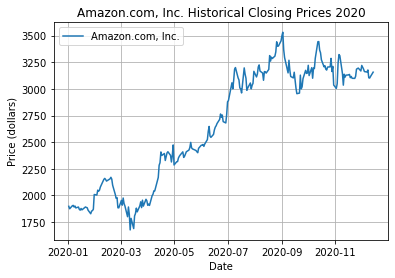

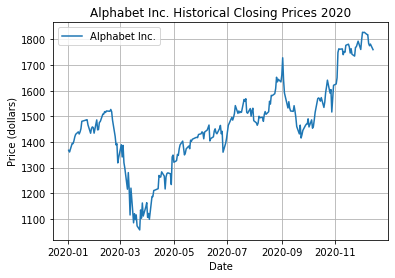

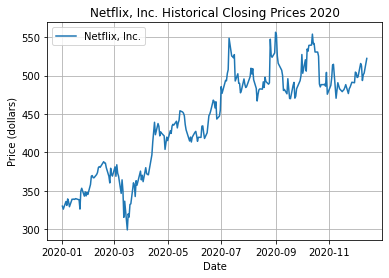

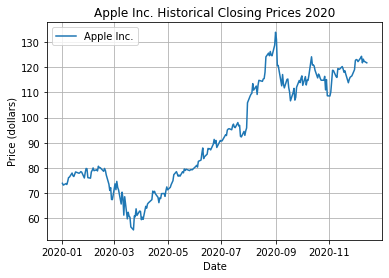

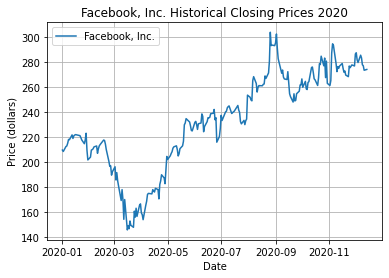

In [11]:
for stock in stock_list:
    recent2020_df = stock.history_df["2020"]
    
    graph_x_list_and_y_list(recent2020_df.index, recent2020_df["Close"], stock.company_name)

    plt.xlabel("Date")
    plt.ylabel("Price (dollars)")
    plt.title("{} Historical Closing Prices 2020".format(stock.company_name))
    plt.legend(loc="upper left")
    plt.grid()

    plt.show()

The graphs above show the closing prices of the FAANG stocks within 2020. This allows us to have to closer look into the performances of each stock. 

It is important to note that the y-axis(price) of each graph is different. For example, Apple's lowest and highest price was around \\$50 and \\$140, respectively. Conversely, Amazon's lowest and highest price was around \\$1650 and \\$3550, respectively. Therefore, although all the stocks seem to have similar trends, the prices vary greatly.

All in all, the FAANG stocks seem to be correlated in their performance.

In addition to the closing prices, we can also look at buy/sell opportunities within the FAANG stocks of 2020. For this analysis, we will use a simple __Moving Average Strategy__ to determine how frequently a stock should be bought or sold.

# Moving Average Strategy on *each* FAANG stock.

> _"The __moving average (MA)__ is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses" ([Investopedia](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp), 2020)._ 


The code below calculates the moving average (MA). This will smooth out the trend lines and allow us to conduct the Moving Average Strategy. The longer the period of time, the smoother the line.

### What is the Moving Average Strategy? 
The Moving Average Strategy uses two different MA time periods. For this analysis, we used __5 days and 25 days__. Finance analysts will look at points in which these two MAs intersect. At the point of the two MA intersections, if the short-term MA has a positive slope, then this strategy recommends you __buy__. If not, you __sell__. 

In [12]:
def get_rolling_col_name_list(rolling_period_list):
    return ["{} Day MA".format(rolling_period) for rolling_period in rolling_period_list]



In [18]:
def get_ma_strategy_df_list(stock_list, rolling_period_list):

    ma_strategy_df_list = []

    for stock in stock_list:

        close_df = stock.history_df["2020"]
        close_df = close_df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis=1)

        rolling_col_name_list = get_rolling_col_name_list(rolling_period_list)
        for rolling_period, rolling_col_name in zip(rolling_period_list, rolling_col_name_list):
            close_df[rolling_col_name] = close_df["Close"].rolling(window=rolling_period).mean()

        close_df["MA Delta"] = close_df[rolling_col_name_list[1]] - close_df[rolling_col_name_list[0]]
        close_df["sign"] = np.where(close_df["MA Delta"] > 0, True, False)
        close_df["sign lagged"] = close_df["sign"].shift(1)
        close_df["raw signal"] = np.where(close_df["sign"] != close_df["sign lagged"], close_df["MA Delta"], False)
        close_df["signal"] = np.where(close_df["raw signal"], close_df[rolling_col_name_list[0]], np.NaN)
        close_df["Buy"] = np.where(close_df["raw signal"] < 0, close_df["Close"], np.NaN)
        close_df["Sell"] = np.where(close_df["raw signal"] > 0, close_df["Close"], np.NaN)

        ma_strategy_df_list.append(close_df)

    return ma_strategy_df_list

In [19]:
def graph_ma_strategy_df_list(stock_list, rolling_period_list, ma_strategy_df_list):
    for i, ma_strategy_df in enumerate(ma_strategy_df_list):

        plt.plot(ma_strategy_df.index, ma_strategy_df["Close"], label="Closing", zorder=1)
        for rolling_col_name in get_rolling_col_name_list(rolling_period_list):
            plt.plot(ma_strategy_df.index, ma_strategy_df[rolling_col_name], label=rolling_col_name, zorder=1)

        plt.scatter(ma_strategy_df.index, ma_strategy_df["signal"],
                    color="indigo", marker='o', alpha=1, zorder=2, label="MA Intersections")
        plt.scatter(ma_strategy_df.index, ma_strategy_df["Buy"],
                    color='green', marker='^', alpha=1, zorder=3, label="Buy Signals")
        plt.scatter(ma_strategy_df.index, ma_strategy_df["Sell"],
                    color='red', marker='v', alpha=1, zorder=3, label="Sell Signals")

        plt.xlabel("Date")
        plt.ylabel("Price (dollars)")
        plt.title("{} Historical Closing Prices 2020".format(stock_list[i].company_name))
        plt.legend(loc="upper left")
        plt.grid()

        plt.show()

In [20]:
def print_buy_sell_stats(stock_list, ma_strategy_df_list):
    for i, ma_strategy_df in enumerate(ma_strategy_df_list):
        print(
            "Stock: {}\n\tBuy Count: {}\n\tSell Count: {}".format(
                stock_list[i].company_name,
                ma_strategy_df["Buy"].count(),
                ma_strategy_df["Sell"].count()
            )
        )


In [25]:
def graph_ma_strategy_df_list(stock_list, rolling_period_list, ma_strategy_df_list):
    for i, ma_strategy_df in enumerate(ma_strategy_df_list):

        plt.plot(ma_strategy_df.index, ma_strategy_df["Close"], label="Closing", zorder=1)
        for rolling_col_name in get_rolling_col_name_list(rolling_period_list):
            plt.plot(ma_strategy_df.index, ma_strategy_df[rolling_col_name], label=rolling_col_name, zorder=1)

        plt.scatter(ma_strategy_df.index, ma_strategy_df["signal"], color="indigo", marker='o', alpha=1, zorder=2)
        plt.scatter(ma_strategy_df.index, ma_strategy_df["Buy"], color='green', marker='^', alpha=1, zorder=2)
        plt.scatter(ma_strategy_df.index, ma_strategy_df["Sell"], color='red', marker='v', alpha=1, zorder=2)

        plt.xlabel("Date")
        plt.ylabel("Price (dollars)")
        plt.title("{} Historical Closing Prices 2020".format(stock_list[i].company_name))
        plt.legend(loc="upper left")
        plt.grid()

        plt.show()
        

In [22]:
rolling_period_list = [5, 25]


In [23]:
ma_strategy_df_list = get_ma_strategy_df_list(stock_list, rolling_period_list)


### Counting the Buy and Sell opportunities. 
Usually this method is used to find the opportunities when traders should buy or sell the stock. __Therefore, stocks with higher counts are more volatile__. 
Below are the calculated counts for each stock: 

In [24]:
print_buy_sell_stats(stock_list, ma_strategy_df_list)


Stock: Amazon.com, Inc.
	Buy Count: 4
	Sell Count: 5
Stock: Alphabet Inc.
	Buy Count: 4
	Sell Count: 4
Stock: Netflix, Inc.
	Buy Count: 6
	Sell Count: 6
Stock: Apple Inc.
	Buy Count: 5
	Sell Count: 5
Stock: Facebook, Inc.
	Buy Count: 7
	Sell Count: 8


### Buy & Sell Frequency per Stock
Let's graph each stock's closing price, 5 Day MA, and 25 Day MA. 
- <font color=purple>__Purple dots__</font>: Points of intersection (each purple dot either has a red down arrow or green up arrow)
- <font color=red>__Red down arrows__</font>: points to __sell__.
- <font color=green>__Green up arrows__</font>: points to __buy__.
- <font color=lightblue>__Light blue lines__</font>: Closing price line.
- <font color=orange>__Orange lines__</font>: 5 Day MA line.
- <font color=lightgreen>__Light green lines__</font>: 25 Day MA line.


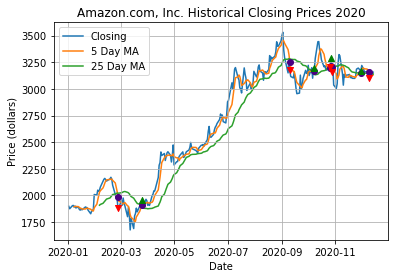

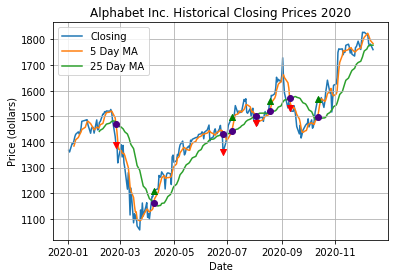

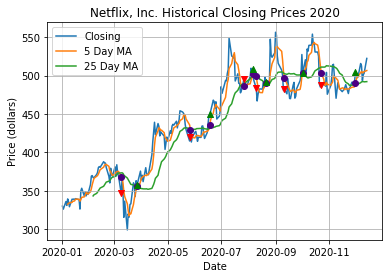

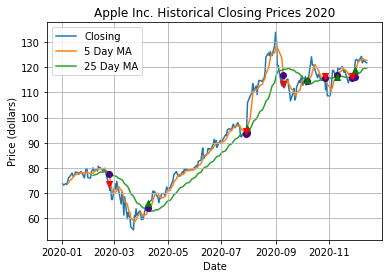

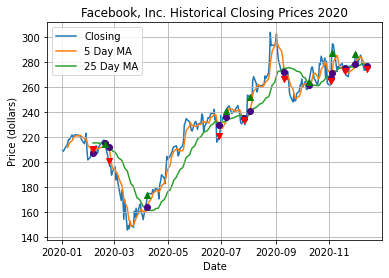

In [26]:
graph_ma_strategy_df_list(stock_list, rolling_period_list, ma_strategy_df_list)

#  Insights and Analysis: Amazon and Google do well
After conducting the Moving Average Strategy, we can see the intersections of the two MA lines. The longer the MA period of time, the "smoother" the lines will get. However, picking 5 days and 25 days allows us to assess the prices roughly once a week and once a month. These lengths of time smooths out the line without ignoring all the peaks and troughs during these unstable, volatile times. 

Facebook was the most volatile during 2020. Netflix and Apple were similar in volatility. As we can see, __Google__ (Alphabet) and __Amazon__ has the least count. Therefore, they are the _least volatile_ among the FAANG stocks.
- Stock: Alphabet Inc.
    - Buy Count: 4
    - Sell Count: 4
- Stock: Amazon.com, Inc.
    - Buy Count: 4
    - Sell Count: 5

Moreover, __Amazon__ has a longer period without a buy & sell opportunity (between March 2020 to September 2020). This means that there was a longer period of time in which Amazon was more stable. _What could've attributed to Amazon's stable and high stock performance... especially during the most uncertain times of the pandemic?_ Perhaps there was an increase in the searches for online retail. In the `analysis_notebook_03_google_trends_analysis.ipynb` notebook, we will use Google Trends to see if there was a correlation between number of Amazon keyword searches and Amazon's stock performance. 